sdi1600014, sdi1600114
https://drive.google.com/open?id=15ExU20Lje3q9WmbM9LaIzrHd33sUsbB3
δεν μπορουσαμε να ανεβασουμε ολα τα αρχεια στο eclass οποτε τα ανεβασαμε στο googledrive
στον φάκελο υπάρχει ένας old φακελος που είναι η πρώτη μας προσπάθεια για την εργασία, τα περισότερα απο αυτα τα έχουμε μεταφέρει και σε αυτό το αρχείο και στην τελική μας προσπάθεια, κάποια όμως όχι πχ splittrain.
Έχουμέ πολλά pickle αρχεία που κυρίως είναι classifiers και cleared tweets.
Δέν έχουμε συμπεριλάβοι τους pretrained classifiers που μας προτείνατε να κατεβάσουμε γτ είναι μεγάλα αρχεία.
Έχουμε προσθέσει ένα ακόμα λεξικό που βρήκαμε για slang

In [3]:
import nltk
import pandas as pd
import re
from nltk import word_tokenize
import string 
from nltk.corpus import stopwords
import pickle
import csv
from nltk.stem import StemmerI, RegexpStemmer, LancasterStemmer, ISRIStemmer, PorterStemmer, SnowballStemmer, RSLPStemmer
from nltk.corpus import wordnet
import gensim
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# mpori na min ine eggatestimena
from xgboost import XGBClassifier
from wordcloud import WordCloud, STOPWORDS

# clear train

καθαρίζω 
    τα @
    τα link
    τα stopwords
    τα symbola punctuation ^,%.!( κτλ
    τους αριθμούς που είναι σκέτοι πχ δεν καθαρίζω το 1st

αντικαθιστώ τις slang λεξεις πχ omg=oh my god

εχω προσπαθήσει να σβήσω τα unicode πχ /u2001 αλλά δεν τα κατάφερα
    

In [2]:
# clear train



# # read data
# Location = r'/home/stratos/Desktop/ted_Project/twitter_data/train2017.tsv'
# df = pd.read_csv(Location, error_bad_lines=False,
#                  names=['no1','no2','cent','tweet'],
#                 sep='\t')

# def remove_duck(s):
#     return re.sub(r'@[A-Za-z0-9]+',' ',s)

# def remove_links(s):
#     return re.sub('https?://[A-Za-z0-9./]+',' ',s)

# def remove_numbers(s):
#     return re.sub('(?:[0-9]+\s+|[0-9]+$)',' ',s)

# def remove_consecutive(s):
#     return re.sub(r"(\w)\1{2,}",r'\1',s)

# def remove_whitespace(s):
#     return re.sub('\s+', ' ', s).strip()

# def remove_unicode(s):
#     return re.sub(r'\\u\s', ' ', s)

# def remove_punctuation(s):
#     exclude = set(string.punctuation)
#     s = ''.join(ch for ch in s if ch not in exclude)
#     return s

# def remove_stopwords(s):
#     stop_words = set(stopwords.words('english'))   
#     a=[w for w in word_tokenize(s) if not w in stop_words] 
#     tmp=''
#     for word in a:
#         tmp=tmp+' '+word
#     return tmp

# # Code From: https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222
# def remove_slang(user_string):
#     user_string = user_string.split(" ")
#     j = 0
#     for _str in user_string:
#         # File path which consists of Abbreviations.
#         fileName = "/home/stratos/Desktop/ted_Project/lexica/slang.txt"

#         # File Access mode [Read Mode]
#         with open(fileName, "r") as myCSVfile:
#             # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
#             dataFromFile = csv.reader(myCSVfile, delimiter="=")
#             # Removing Special Characters.
#             _str = re.sub('[^a-zA-Z0-9]+', '', _str)
#             for row in dataFromFile:
#                 # Check if selected word matches short forms[LHS] in text file.
#                 if _str.upper() == row[0]:
#                     # If match found replace it with its appropriate phrase in text file.
#                     user_string[j] = row[1]
#             myCSVfile.close()
#         j = j + 1
#     return ' '.join(user_string)


# tokens=[]
# cent=[]
# for index, row in df.iterrows():
#     s=row['tweet']
# #     s=remove_unicode(s)
#     s=remove_duck(s)
#     s=remove_links(s)
#     s=remove_slang(s)
#     s=remove_punctuation(s)
#     s=s.lower()
#     s=remove_stopwords(s)
#     s=remove_numbers(s)
#     s=remove_consecutive(s)
#     s=remove_whitespace(s)
#     tokens.append(s)
#     cent.append(row['cent'])

# # save tokens
# outfile=open('filtered_tweets_train.pickle','wb')
# pickle.dump(tokens,outfile)
# outfile.close()

# # save cent
# outfile=open('cent_train.pickle','wb')
# pickle.dump(cent,outfile)
# outfile.close()

# read tokens
infile = open('filtered_tweets_train.pickle','rb')
tokens = pickle.load(infile)
infile.close()

# read cent
infile = open('cent_train.pickle','rb')
cent = pickle.load(infile)
infile.close()

print(tokens,cent)

['gas house hit im going chapel hill sat', 'theo walcott still shit watch rafa johnny deal saturday', 'im gsp fan hate nick diaz cant wait february', 'iranian general says israels iron dome cant deal missiles keep talking like may end finding', 'tehran mon amour obama tried establish ties mullahs via com barack obama vote mitt romney', 'sat whole movie harry ron christmas ohlawd', 'j davlar 11th main rivals team poland hopefully make successful end tough week training tomorrow', 'talking acts sats deciding want go college applying colleges everything college stresses', 'happy valentines day trending 14th february 12th june smh', 'may superbowl dallas dallas aint winning superbowl quarterback owner', 'im bringing monster load candy tomorrow hope doesnt get squiched', 'apple software retail chiefs overhaul san francisco apple inc ceo tim cook monday replaced heads', 'otti watched sridevis comeback remember 90s sun mornings nta', 'one best 8th graders kory excited touchdown today victor c

# steaming train

In [3]:
# steaming train

# # read tokens
# infile = open('filtered_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

# #stemmer = WordNetLemmatizer()
# #stemmer = LancasterStemmer()
# stemmer = SnowballStemmer('english')
# #stemmer = PorterStemmer()

# # tokenize
# tokens=[word_tokenize(s) for s in tweets]

# # steamming
# stems=[]
# for tweet in tokens:
#     tmp=[]
#     for w in tweet:
#         tmp.append(stemmer.stem(w))
#     stems.append(tmp)

# # detokenize
# stemmed_tweets=[]
# for tweet in stems:
#     if tweet:
#         tmp=tweet[0]
#         for word in tweet[1:]:
#             tmp=tmp+' '+word
#     else:
#         tmp=''
#     stemmed_tweets.append(tmp)
    
# # save stemmed_tweets
# outfile=open('stemmed_tweets_train.pickle','wb')
# pickle.dump(stemmed_tweets,outfile)
# outfile.close()
    
# read stemmed_tweets
infile = open('stemmed_tweets_train.pickle','rb')
stemmed_tweets = pickle.load(infile)
infile.close()

print(stemmed_tweets)


['gas hous hit im go chapel hill sat', 'theo walcott still shit watch rafa johnni deal saturday', 'im gsp fan hate nick diaz cant wait februari', 'iranian general say israel iron dome cant deal missil keep talk like may end find', 'tehran mon amour obama tri establish tie mullah via com barack obama vote mitt romney', 'sat whole movi harri ron christma ohlawd', 'j davlar 11th main rival team poland hope make success end tough week train tomorrow', 'talk act sat decid want go colleg appli colleg everyth colleg stress', 'happi valentin day trend 14th februari 12th june smh', 'may superbowl dalla dalla aint win superbowl quarterback owner', 'im bring monster load candi tomorrow hope doesnt get squich', 'appl softwar retail chief overhaul san francisco appl inc ceo tim cook monday replac head', 'otti watch sridevi comeback rememb 90s sun morn nta', 'one best 8th grader kori excit touchdown today victor cruzlol', 'livewir nadal confirm mexican open februari rafael nadal set play livewireath

# lematizing train

In [4]:
# lematizing train



# # Lemmatize with POS Tag
# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     return tag_dict.get(tag, wordnet.NOUN)

# from nltk.stem import  WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# # read tokens
# infile = open('filtered_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

# # tokenize
# tokens=[word_tokenize(s) for s in tweets]

# # lemmatize all words in [[],[],...] format
# lemmatized=[]
# for tweet in tokens:
#     tmp=[]
#     for w in tweet:
#         tmp.append(lemmatizer.lemmatize(w, get_wordnet_pos(w)))
#     lemmatized.append(tmp)
    
# # detokenize
# lemmatized_tweets=[]
# for tweet in lemmatized:
#     if tweet:
#         tmp=tweet[0]
#         for word in tweet[1:]:
#             tmp=tmp+' '+word
#     else:
#         tmp=''
#     lemmatized_tweets.append(tmp)
    
# # saving lemmatized_tweets 
# outfile=open('lemmatized_tweets_train.pickle','wb')
# pickle.dump(lemmatized_tweets,outfile)
# outfile.close()

# read lemmatized_tweets 
infile = open('lemmatized_tweets_train.pickle','rb')
lemmatized_tweets = pickle.load(infile)
infile.close()
    
print(lemmatized_tweets)

['gas house hit im go chapel hill sat', 'theo walcott still shit watch rafa johnny deal saturday', 'im gsp fan hate nick diaz cant wait february', 'iranian general say israel iron dome cant deal missile keep talk like may end find', 'tehran mon amour obama try establish tie mullah via com barack obama vote mitt romney', 'sat whole movie harry ron christmas ohlawd', 'j davlar 11th main rival team poland hopefully make successful end tough week training tomorrow', 'talk act sat decide want go college apply college everything college stress', 'happy valentine day trend 14th february 12th june smh', 'may superbowl dallas dallas aint win superbowl quarterback owner', 'im bring monster load candy tomorrow hope doesnt get squiched', 'apple software retail chief overhaul san francisco apple inc ceo tim cook monday replace head', 'otti watch sridevis comeback remember 90 sun morning nta', 'one best 8th grader kory excite touchdown today victor cruzlol', 'livewire nadal confirm mexican open febr

προετοιμασια δεδομενων

In [5]:
no_first_words=30

# read tokens
infile = open('filtered_tweets_train.pickle','rb')
tokenss = pickle.load(infile)
infile.close()

# read cent
infile = open('cent_train.pickle','rb')
cent = pickle.load(infile)
infile.close()

tokens=[]
for s in tokenss:
    tokens.append([w for w in word_tokenize(s)])

# most common negative

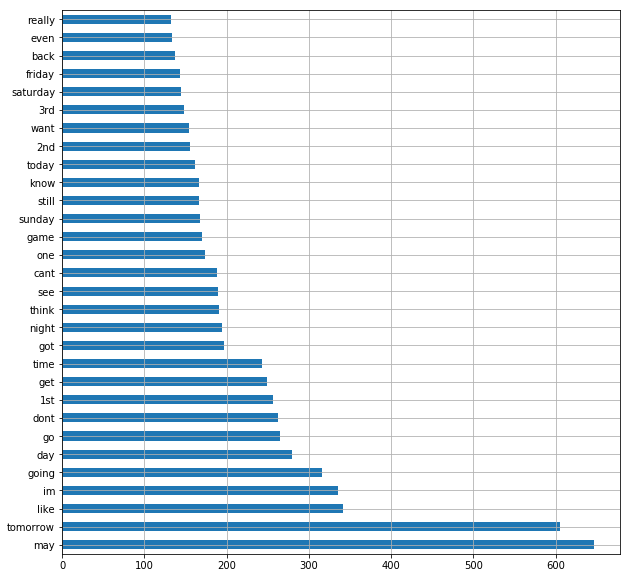

In [6]:
#most common negative

# # tockens=[[],[]...] filtered=[...]
filtered=[]
for tweet, c in zip(tokens, cent):
    if(c=="negative"):
        filtered.extend(tweet)
    
# # find no_first_words most used words
count = Counter(filtered)
most_common=count.most_common(no_first_words)

# plot histogram
dff = pd.DataFrame.from_dict(dict(most_common), orient='index')
%matplotlib inline
dff.plot(kind='barh',grid=True,figsize=(no_first_words/3,no_first_words/3),legend=False)

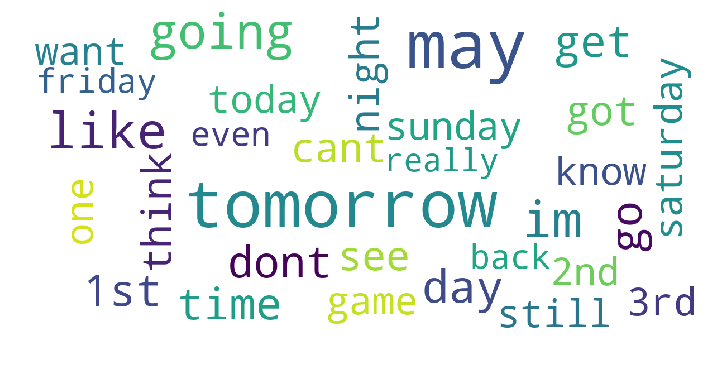

In [7]:
#most common negative

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dict(most_common))

# most common positive

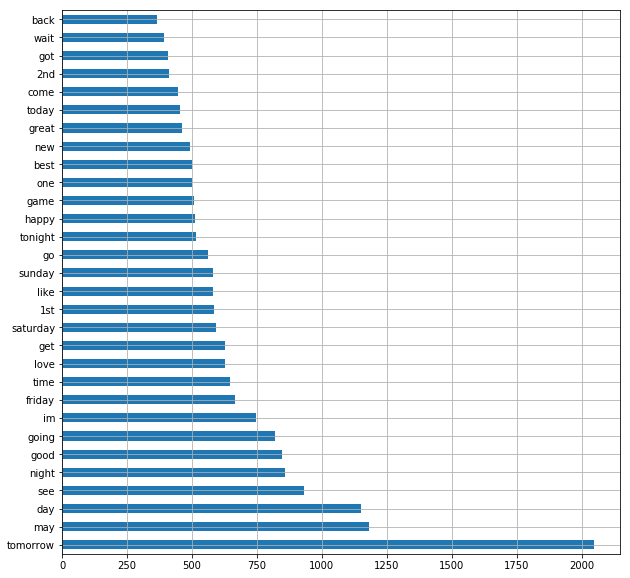

In [8]:
#most common positive



# # tockens=[[],[]...] filtered=[...]
filtered=[]
for tweet, c in zip(tokens, cent):
    if(c=="positive"):
        filtered.extend(tweet)
    
# # find no_first_words most used words
count = Counter(filtered)
most_common=count.most_common(no_first_words)

# plot histogram
dff = pd.DataFrame.from_dict(dict(most_common), orient='index')
%matplotlib inline
dff.plot(kind='barh',grid=True,figsize=(no_first_words/3,no_first_words/3),legend=False)


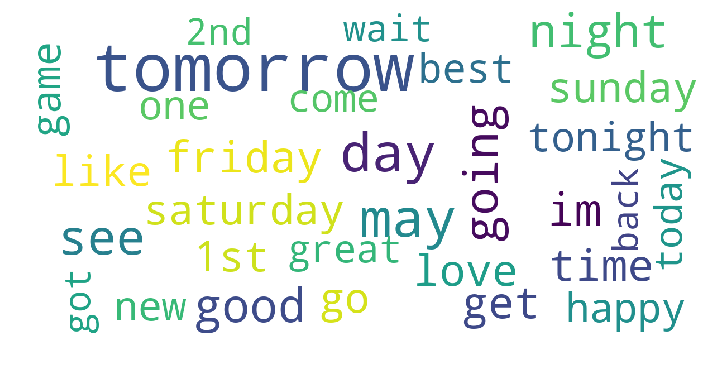

In [9]:
#most common positive

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(dict(most_common))

# most common neutral

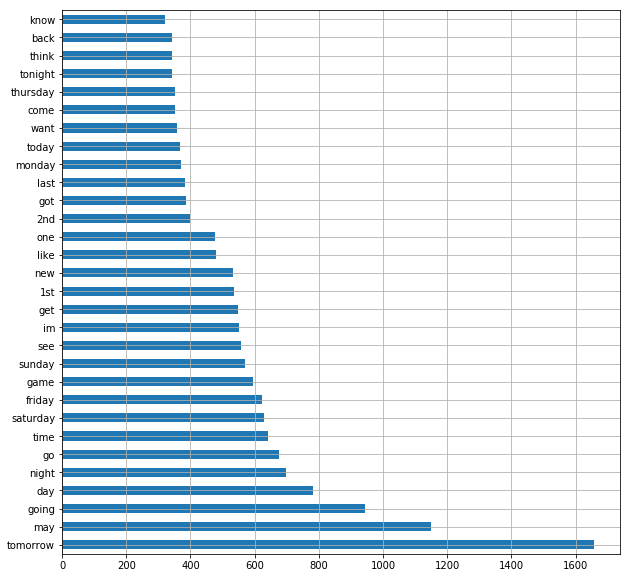

In [10]:
#most common neutral


# # tockens=[[],[]...] filtered=[...]
filtered=[]
for tweet, c in zip(tokens, cent):
    if(c=="neutral"):
        filtered.extend(tweet)
    
# # find 30 most used words
count = Counter(filtered)
most_common=count.most_common(no_first_words)

# plot histogram
dff = pd.DataFrame.from_dict(dict(most_common), orient='index')
%matplotlib inline
dff.plot(kind='barh',grid=True,figsize=(no_first_words/3,no_first_words/3),legend=False)


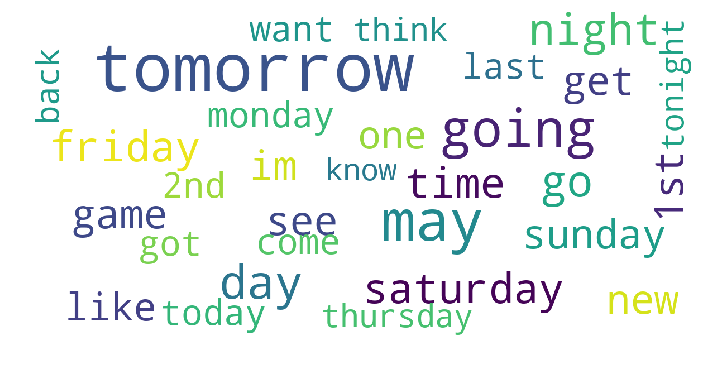

In [11]:
#most common neutral

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(dict(most_common))

# most common words (all of them)

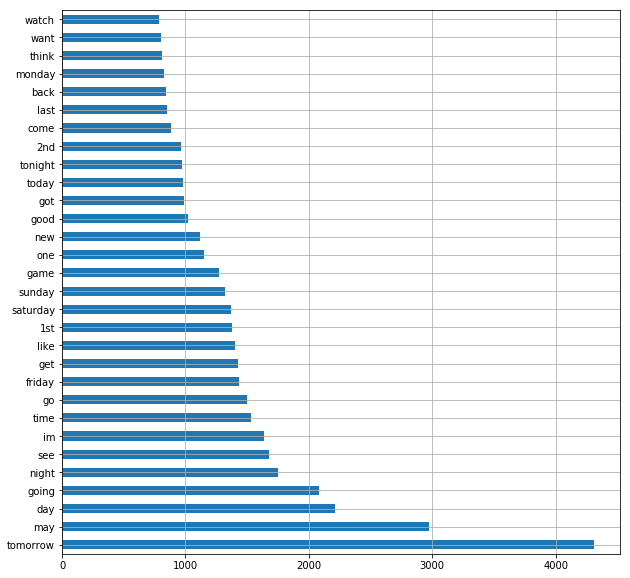

In [12]:
#most common 


# # tockens=[[],[]...] filtered=[...]
filtered=[]
for tweet in tokens:
    filtered.extend(tweet)
    
# # find 30 most used words
count = Counter(filtered)
most_common=count.most_common(no_first_words)

# plot histogram
dff = pd.DataFrame.from_dict(dict(most_common), orient='index')
%matplotlib inline
dff.plot(kind='barh',grid=True,figsize=(no_first_words/3,no_first_words/3),legend=False)


# clear test

In [13]:
# clear test

# # read data
# Location = r'/home/stratos/Desktop/ted_Project/twitter_data/test2017.tsv'
# df = pd.read_csv(Location, error_bad_lines=False,
#                  names=['no1','no2','cent','tweet'],
#                 sep='\t')

# Location = r'/home/stratos/Desktop/ted_Project/twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt'
# dff = pd.read_csv(Location, error_bad_lines=False,
#                  names=['no1','cent'],
#                 sep='\t')

# cent=[]
# for index, row in dff.iterrows():
#     cent.append(row['cent'])

# def remove_duck(s):
#     return re.sub(r'@[A-Za-z0-9]+',' ',s)

# def remove_links(s):
#     return re.sub('https?://[A-Za-z0-9./]+',' ',s)

# def remove_numbers(s):
#     return re.sub('(?:[0-9]+\s+|[0-9]+$)',' ',s)

# def remove_consecutive(s):
#     return re.sub(r"(\w)\1{2,}",r'\1',s)

# def remove_whitespace(s):
#     return re.sub('\s+', ' ', s).strip()

# def remove_unicode(s):
#     return re.sub(r'\\u\s', ' ', s)

# def remove_punctuation(s):
#     exclude = set(string.punctuation)
#     s = ''.join(ch for ch in s if ch not in exclude)
#     return s

# def remove_stopwords(s):
#     stop_words = set(stopwords.words('english'))   
#     a=[w for w in word_tokenize(s) if not w in stop_words] 
#     tmp=''
#     for word in a:
#         tmp=tmp+' '+word
#     return tmp

# # Code From: https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222
# def remove_slang(user_string):
#     user_string = user_string.split(" ")
#     j = 0
#     for _str in user_string:
#         # File path which consists of Abbreviations.
#         fileName = "/home/stratos/Desktop/ted_Project/lexica/slang.txt"

#         # File Access mode [Read Mode]
#         with open(fileName, "r") as myCSVfile:
#             # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
#             dataFromFile = csv.reader(myCSVfile, delimiter="=")
#             # Removing Special Characters.
#             _str = re.sub('[^a-zA-Z0-9]+', '', _str)
#             for row in dataFromFile:
#                 # Check if selected word matches short forms[LHS] in text file.
#                 if _str.upper() == row[0]:
#                     # If match found replace it with its appropriate phrase in text file.
#                     user_string[j] = row[1]
#             myCSVfile.close()
#         j = j + 1
#     return ' '.join(user_string)


# tokens=[]
# for index, row in df.iterrows():
#     s=row['tweet']
# #     s=remove_unicode(s)
#     s=remove_duck(s)
#     s=remove_links(s)
#     s=remove_slang(s)
#     s=remove_punctuation(s)
#     s=s.lower()
#     s=remove_stopwords(s)
#     s=remove_numbers(s)
#     s=remove_consecutive(s)
#     s=remove_whitespace(s)
#     tokens.append(s)

# # save tokens
# outfile=open('filtered_tweets_test.pickle','wb')
# pickle.dump(tokens,outfile)
# outfile.close()

# # save cent
# outfile=open('cent_test.pickle','wb')
# pickle.dump(cent,outfile)
# outfile.close()

# read tokens
infile = open('filtered_tweets_test.pickle','rb')
tokens = pickle.load(infile)
infile.close()

# read cent
infile = open('cent_test.pickle','rb')
cent = pickle.load(infile)
infile.close()

print(tokens,cent)

['arianagrande ari ariana grande full singer actress', 'ariana grande kiis fm truly cd listening party burbank arianagrande', 'ariana grande white house easter egg roll washington arianagrande', 'cd musics ariana grande sweet like candy oz ml sealed box authenic new', 'side side sidetoside arianagrande musically comunidadgay lgbt lotb', 'hairspray live previews macys thanksgiving day parade arianagrande televisionnbc', 'lindsaylohan feeling thankful blasting arianagrande wearing toomuch', 'hate love songs dammit arianagrande', 'ariana grande right ft big sean arianagrande', 'one would prefer listen whole day could never choose arianagrande intoyou sidetoside songs poll', 'booty baby ariarianagrande princessari bootybaby dangerouswomantour dangerouswoman', 'lindsaylohan backs kettering holiday appearance throwing shade arianagrande lilo', 'idols littlemix justinbieber arianagrande', 'ariana grande sims simsdomination arianagrande', 'music arianagrandethe remixjapan cd e bestseller hit',

# steaming test

In [14]:
# steaming test

# # read tokens
# infile = open('filtered_tweets_test.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

# #stemmer = WordNetLemmatizer()
# #stemmer = LancasterStemmer()
# stemmer = SnowballStemmer('english')
# #stemmer = PorterStemmer()

# # tokenize
# tokens=[word_tokenize(s) for s in tweets]

# # steamming
# stems=[]
# for tweet in tokens:
#     tmp=[]
#     for w in tweet:
#         tmp.append(stemmer.stem(w))
#     stems.append(tmp)

# # detokenize
# stemmed_tweets=[]
# for tweet in stems:
#     if tweet:
#         tmp=tweet[0]
#         for word in tweet[1:]:
#             tmp=tmp+' '+word
#     else:
#         tmp=''
#     stemmed_tweets.append(tmp)
    
# # save stemmed_tweets
# outfile=open('stemmed_tweets_test.pickle','wb')
# pickle.dump(stemmed_tweets,outfile)
# outfile.close()
    
# read stemmed_tweets
infile = open('stemmed_tweets_test.pickle','rb')
stemmed_tweets = pickle.load(infile)
infile.close()

print(stemmed_tweets)


['arianagrand ari ariana grand full singer actress', 'ariana grand kii fm truli cd listen parti burbank arianagrand', 'ariana grand white hous easter egg roll washington arianagrand', 'cd music ariana grand sweet like candi oz ml seal box authen new', 'side side sidetosid arianagrand music comunidadgay lgbt lotb', 'hairspray live preview maci thanksgiv day parad arianagrand televisionnbc', 'lindsaylohan feel thank blast arianagrand wear toomuch', 'hate love song dammit arianagrand', 'ariana grand right ft big sean arianagrand', 'one would prefer listen whole day could never choos arianagrand intoyou sidetosid song poll', 'booti babi ariarianagrand princessari bootybabi dangerouswomantour dangerouswoman', 'lindsaylohan back ketter holiday appear throw shade arianagrand lilo', 'idol littlemix justinbieb arianagrand', 'ariana grand sim simsdomin arianagrand', 'music arianagrandeth remixjapan cd e bestsel hit', 'beauti arianagrandechristma chilljapan cd bonus track c deal topsel', 'popular

# lematizing test

In [15]:
# lematizing test



# # Lemmatize with POS Tag
# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     return tag_dict.get(tag, wordnet.NOUN)

# from nltk.stem import  WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# # read tokens
# infile = open('filtered_tweets_test.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

# # tokenize
# tokens=[word_tokenize(s) for s in tweets]

# # lemmatize all words in [[],[],...] format
# lemmatized=[]
# for tweet in tokens:
#     tmp=[]
#     for w in tweet:
#         tmp.append(lemmatizer.lemmatize(w, get_wordnet_pos(w)))
#     lemmatized.append(tmp)
    
# # detokenize
# lemmatized_tweets=[]
# for tweet in lemmatized:
#     if tweet:
#         tmp=tweet[0]
#         for word in tweet[1:]:
#             tmp=tmp+' '+word
#     else:
#         tmp=''
#     lemmatized_tweets.append(tmp)
    
# # saving lemmatized_tweets 
# outfile=open('lemmatized_tweets_test.pickle','wb')
# pickle.dump(lemmatized_tweets,outfile)
# outfile.close()

# read lemmatized_tweets 
infile = open('lemmatized_tweets_test.pickle','rb')
lemmatized_tweets = pickle.load(infile)
infile.close()
    
print(lemmatized_tweets)

['arianagrande ari ariana grande full singer actress', 'ariana grande kiis fm truly cd listen party burbank arianagrande', 'ariana grande white house easter egg roll washington arianagrande', 'cd music ariana grande sweet like candy oz ml seal box authenic new', 'side side sidetoside arianagrande musically comunidadgay lgbt lotb', 'hairspray live preview macys thanksgiving day parade arianagrande televisionnbc', 'lindsaylohan feel thankful blasting arianagrande wear toomuch', 'hate love song dammit arianagrande', 'ariana grande right ft big sean arianagrande', 'one would prefer listen whole day could never choose arianagrande intoyou sidetoside song poll', 'booty baby ariarianagrande princessari bootybaby dangerouswomantour dangerouswoman', 'lindsaylohan back kettering holiday appearance throw shade arianagrande lilo', 'idol littlemix justinbieber arianagrande', 'ariana grande sims simsdomination arianagrande', 'music arianagrandethe remixjapan cd e bestseller hit', 'beauty arianagrand

στο classification με tfidf και bow οτι κάνουμε το κάνουμε για 1000,1500,3000 features.
παίρνουμε αποτελέσματα και για το training set και για το test set.
έχουμε κάνει split train στα old αρχεία, αλλά δενν το έχουμε συμπεριλάβει εδω.

# knn tf_idf

In [16]:


# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    bow_vectorizer = TfidfVectorizer(max_features=features)
#     bow_xtrain = bow_vectorizer.fit_transform(tweets_train)

#     knn = neighbors.KNeighborsClassifier(algorithm='brute',weights='distance')
#     knn = knn.fit(bow_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("knn_tfidf_"+str(features)+".pickle",'wb')
#     pickle.dump(knn,outfile)
#     outfile.close()

    # read classifier
    infile = open("knn_tfidf_"+str(features)+".pickle",'rb')
    knn = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_train)
    prediction = knn.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_test)
    prediction = knn.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1000 ended
1000 features train score= 0.9932123783512962
1000 features test score= 0.3117671830790015


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1500 ended
1500 features train score= 0.9955075029668454
1500 features test score= 0.3009103244896304


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 3000 ended
3000 features train score= 0.9974082884386727
3000 features test score= 0.28622356560428674
END


# knn bow

In [17]:


# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    bow_vectorizer = CountVectorizer(max_features=features,stop_words='english')
#     bow_xtrain = bow_vectorizer.fit_transform(tweets_train)

#     knn = neighbors.KNeighborsClassifier(algorithm='brute',weights='distance')
#     knn = knn.fit(bow_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("knn_bow_"+str(features)+".pickle",'wb')
#     pickle.dump(knn,outfile)
#     outfile.close()

    # read classifier
    infile = open("knn_bow_"+str(features)+".pickle",'rb')
    knn = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_train)
    prediction = knn.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_test)
    prediction = knn.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1000 ended
1000 features train score= 0.9892814712375797
1000 features test score= 0.30428696763858026


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1500 ended
1500 features train score= 0.9908150651232104
1500 features test score= 0.3167263001933359


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 3000 ended
3000 features train score= 0.996327056635986
3000 features test score= 0.2992591337930082
END


# svc tf idf

In [18]:

# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    bow_vectorizer = TfidfVectorizer(max_features=features)
#     bow_xtrain = bow_vectorizer.fit_transform(tweets_train)

#     svc = svm.SVC(kernel='linear', C=1, probability=True)
#     svc = svc.fit(bow_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("SVC_tfidf_"+str(features)+".pickle",'wb')
#     pickle.dump(svc,outfile)
#     outfile.close()

    # read classifier
    infile = open("SVC_tfidf_"+str(features)+".pickle",'rb')
    svc = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_train)
    prediction = svc.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_test)
    prediction = svc.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1000 ended
1000 features train score= 0.621132889646384
1000 features test score= 0.3331752015380886


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1500 ended
1500 features train score= 0.6510985011598558
1500 features test score= 0.30742670570819675


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 3000 ended
3000 features train score= 0.7030761872479324
3000 features test score= 0.3182557437912468
END


# svc bow

In [19]:

# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    bow_vectorizer = CountVectorizer(max_features=features,stop_words='english')
#     bow_xtrain = bow_vectorizer.fit_transform(tweets_train)

#     svc = svm.SVC(kernel='linear', C=1, probability=True)
#     svc = svc.fit(bow_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("SVC_bow_"+str(features)+".pickle",'wb')
#     pickle.dump(svc,outfile)
#     outfile.close()

    # read classifier
    infile = open("SVC_bow_"+str(features)+".pickle",'rb')
    svc = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_train)
    prediction = svc.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_test)
    prediction = svc.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1000 ended
1000 features train score= 0.3809232637014504
1000 features test score= 0.3154877246990117


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1500 ended
1500 features train score= 0.3957123241127371
1500 features test score= 0.335034643349357


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 3000 ended
3000 features train score= 0.34835966834169
3000 features test score= 0.35345742102532446
END


Βρήκαμε και αλλους classifiers και τους τεσταραμε πανω σε bow και tfidf.
(υπάρχει περίπτωση να μην είναι εγκατεστημένοι στον υπολογηστη σας πχ ο xgb)

# LogisticRegression bow

In [20]:

# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    bow_vectorizer = CountVectorizer(max_features=features,stop_words='english')
#     bow_xtrain = bow_vectorizer.fit_transform(tweets_train)

#     lr = LogisticRegression(n_jobs=4)
#     lr = lr.fit(bow_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("LogisticRegression_bow_"+str(features)+".pickle",'wb')
#     pickle.dump(lr,outfile)
#     outfile.close()

    # read classifier
    infile = open("LogisticRegression_bow_"+str(features)+".pickle",'rb')
    lr = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_train)
    prediction = lr.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_test)
    prediction = lr.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

Training for 1000 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


1000 features train score= 0.6304543818272924
1000 features test score= 0.3467297411101688
Training for 1500 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


1500 features train score= 0.6568595182458764
1500 features test score= 0.314260575444052
Training for 3000 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


3000 features train score= 0.7076670156511237
3000 features test score= 0.3278218607755385
END


# LogisticRegression tfidf

In [21]:
# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    tfidf_vectorizer = TfidfVectorizer(max_features=features)
#     tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_train)

#     lg = LogisticRegression(n_jobs=4)
#     lg = lg.fit(tfidf_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("LogisticRegression_tfidf_"+str(features)+".pickle",'wb')
#     pickle.dump(lg,outfile)
#     outfile.close()

    # read classifier
    infile = open("LogisticRegression_tfidf_"+str(features)+".pickle",'rb')
    lg = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_train)
    prediction = lg.predict(tfidf_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_test)
    prediction = lg.predict(tfidf_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

Training for 1000 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


1000 features train score= 0.6238224257726973
1000 features test score= 0.32095986955668626
Training for 1500 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


1500 features train score= 0.6432772196512057
1500 features test score= 0.29450405600527235
Training for 3000 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


3000 features train score= 0.6783978658912998
3000 features test score= 0.2911872439735094
END


# RandomForestClassifier bow

In [22]:
# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    bow_vectorizer = CountVectorizer(max_features=features,stop_words='english')
#     bow_xtrain = bow_vectorizer.fit_transform(tweets_train)

#     rf = RandomForestClassifier(n_jobs=4,n_estimators=250)
#     rf = rf.fit(bow_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("RandomForestClassifier_bow_"+str(features)+".pickle",'wb')
#     pickle.dump(rf,outfile)
#     outfile.close()

    # read classifier
    infile = open("RandomForestClassifier_bow_"+str(features)+".pickle",'rb')
    rf = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_train)
    prediction = rf.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_test)
    prediction = rf.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1000 ended
1000 features train score= 0.9894169453314673
1000 features test score= 0.34793655481432545


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1500 ended
1500 features train score= 0.9930146958913987
1500 features test score= 0.3361245906264805


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 3000 ended
3000 features train score= 0.996370448026123
3000 features test score= 0.33035302540716666
END


# RandomForestClassifier tfidf

In [23]:

# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    tfidf_vectorizer = TfidfVectorizer(max_features=features)
#     tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_train)

#     rf = RandomForestClassifier(n_jobs=4,n_estimators=250)
#     rf = rf.fit(tfidf_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("RandomForestClassifier_tfidf_"+str(features)+".pickle",'wb')
#     pickle.dump(rf,outfile)
#     outfile.close()

    # read classifier
    infile = open("RandomForestClassifier_tfidf_"+str(features)+".pickle",'rb')
    rf = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_train)
    prediction = rf.predict(tfidf_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_test)
    prediction = rf.predict(tfidf_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1000 ended
1000 features train score= 0.9934315926181664
1000 features test score= 0.32622801933346596


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 1500 ended
1500 features train score= 0.9955259591093214
1500 features test score= 0.31729955716497166


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Training for 3000 ended
3000 features train score= 0.997406709083819
3000 features test score= 0.31246953395115723
END


# xgb bow

In [24]:
# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    bow_vectorizer = CountVectorizer(max_features=features,stop_words='english')
#     bow_xtrain = bow_vectorizer.fit_transform(tweets_train)

#     XGB = XGBClassifier()
#     XGB = XGB.fit(bow_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("XGB_bow_"+str(features)+".pickle",'wb')
#     pickle.dump(XGB,outfile)
#     outfile.close()

    # read classifier
    infile = open("XGB_bow_"+str(features)+".pickle",'rb')
    XGB = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_train)
    prediction = XGB.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    bow_xtrain = bow_vectorizer.fit_transform(tweets_test)
    prediction = XGB.predict(bow_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

Training for 1000 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


1000 features train score= 0.5032354120551682
1000 features test score= 0.2907971252054929
Training for 1500 ended
1500 features train score= 0.5050220093154832
1500 features test score= 0.2713605293687225
Training for 3000 ended
3000 features train score= 0.5025737360222949
3000 features test score= 0.2601306095954575
END


# xgb tfidf

In [25]:

# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

# # read tokens
# infile = open('lemmatized_tweets_train.pickle','rb')
# tweets = pickle.load(infile)
# infile.close()

for features in [1000,1500,3000]:
    tfidf_vectorizer = TfidfVectorizer(max_features=features)
#     tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_train)

#     XGB = XGBClassifier()
#     XGB = XGB.fit(tfidf_xtrain.toarray(), cent_train)

#     # save classifier
#     outfile=open("XGB_tfidf_"+str(features)+".pickle",'wb')
#     pickle.dump(XGB,outfile)
#     outfile.close()

    # read classifier
    infile = open("XGB_tfidf_"+str(features)+".pickle",'rb')
    XGB = pickle.load(infile)
    infile.close()

    print("Training for "+str(features)+" ended")
    
    tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_train)
    prediction = XGB.predict(tfidf_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    tfidf_xtrain = tfidf_vectorizer.fit_transform(tweets_test)
    prediction = XGB.predict(tfidf_xtrain.toarray()) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

Training for 1000 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.3 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


1000 features train score= 0.5041811372331514
1000 features test score= 0.287119036981709
Training for 1500 ended
1500 features train score= 0.5046299185898591
1500 features test score= 0.2579329460040987
Training for 3000 ended
3000 features train score= 0.5050209168718117
3000 features test score= 0.24420513993696
END


προσπαθησαμε να παράγουμε με word2vec διανίσματα αλλά υπάρχει καποιο λαθος και δεν παίρνουμε σωστά αποτελέσματα. Παρακάτω είναι λιγος κώδικας, έχουμε και άλλο κωδικα στα υπόλουπα αρχεία που στο όνομά τους περιέχουν dh αλλά και παλι δεν παίρναμε σωστα αποτελέσματα.

οτι κάνουμε το κάνουμε για 50,100,200,300 features

# train word2vec

In [26]:
words_to_graph=200

# np.set_printoptions(precision=64)

# def tokenized_tweet_to_vec(model,tokenized_tweets,features):
#     length=len(tokenized_tweets)
#     array=np.empty([length,features])
#     for word in tokenized_tweets:
#         if word in model:
#             np.append(array,[np.array(model[word])])
#         else:
#             np.append(array,np.zeros(features))
    
#     if length!=0:
#         ans=[]
#         for column in array.T:
#             tmp=np.nansum(column)
#             if tmp==0:
#                 ans.append(0)
#             else:
#                 ans.append(tmp/length)
#         return np.asarray(ans)
#     else:
#         return np.zeros(features)

# # read tokens
# infile = open('stemmed_tweets_train.pickle','rb')
# tweets_train = pickle.load(infile)
# infile.close()

# tweets_train_tok=[word_tokenize(k) for k in tweets_train] 


# for features in [50,100,200,300]:
#     model_w2v = gensim.models.Word2Vec(
#         tweets_train_tok,
#         size=features, # desired no. of features/independent variables
#         window=5, # context window size
#         min_count=2,
#         sg = 1, # 1 for skip-gram model
#         hs = 0,
#         negative = 10, # for negative sampling
#         workers= 4, # no.of cores
#         seed = 34)
#     model_w2v.build_vocab(tweets_train_tok,update=True)
#     model_w2v.train(tweets_train_tok, total_examples= len(tweets_train_tok), epochs=20)

#     # save w2v
#     outfile=open('model_word2vec_'+str(features)+'.pickle','wb')
#     pickle.dump(model_w2v,outfile)
#     outfile.close()
    
#     print("train for "+str(features)+" ended")


#     # read w2v
#     infile = open('model_word2vec_'+str(features)+'.pickle','rb')
#     model_w2v = pickle.load(infile)
#     infile.close()

#     # prepare vectores
#     vectores=[]
#     for tweet in tweets_train_tok:
#         vectores.append(tokenized_tweet_to_vec(model_w2v.wv.vocab,tweet,features))

#     # save tweet_vec
#     outfile=open('dh_tweet_vec_'+str(features)+'.pickle','wb')
#     pickle.dump(vectores,outfile, protocol=2)
#     outfile.close()

#     print("vectores for "+str(features)+" ended")
    
print("END")

END


συνάρτηση για διάγραμμα

In [7]:
# # read tokens
# infile = open('dh_tweet_vec_'+str(features)+'.pickle','rb')
# vectores = pickle.load(infile)
# infile.close()

# # plot model
def tsne_plot(model,how_many):
    from sklearn.manifold import TSNE
    import random
    from matplotlib import pyplot as plt
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    while len(tokens)>how_many:
        labels.pop(random.randrange(len(labels)))
        tokens.pop(random.randrange(len(tokens)))
    
    tsne_model = TSNE(perplexity=40, n_components=2,
    init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
    plt.show()


# διάγραμμα για 50 features

In [8]:
# read w2v
infile = open('model_word2vec_50.pickle','rb')
model_w2v = pickle.load(infile)
infile.close()

%matplotlib inline
tsne_plot(model_w2v,words_to_graph)

UnpicklingError: pickle data was truncated

# διάγραμμα για 100 features

/home/stratos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


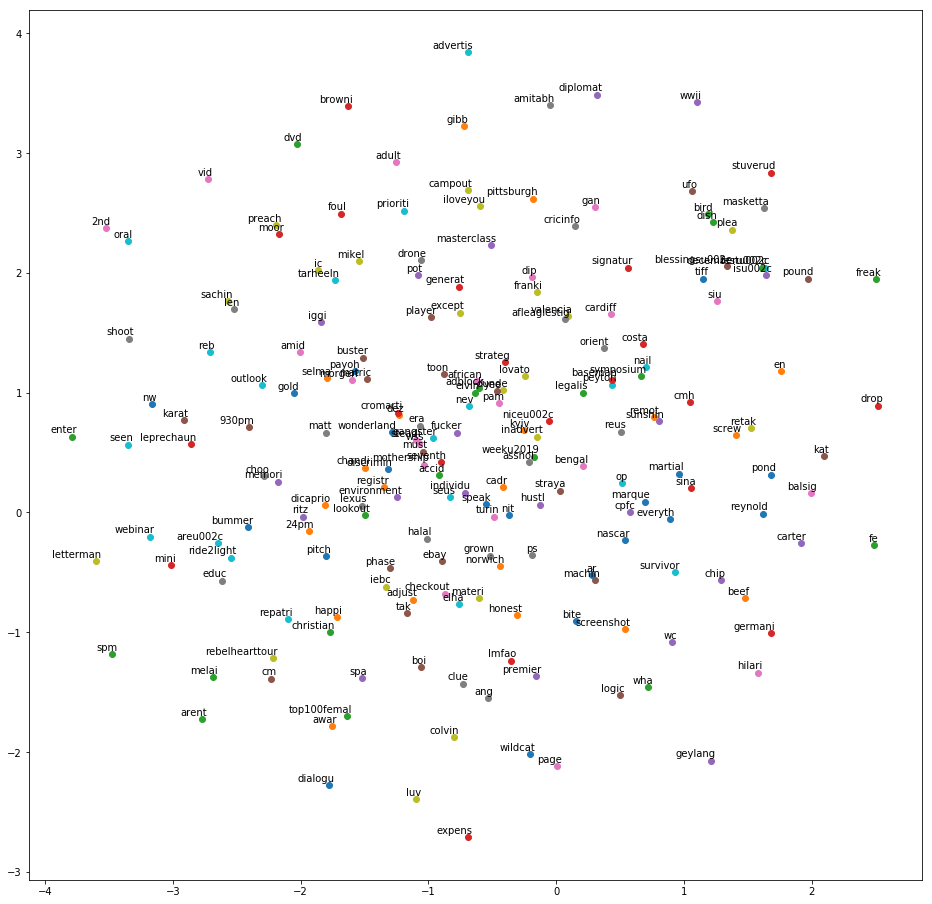

In [31]:
# read w2v
infile = open('model_word2vec_100.pickle','rb')
model_w2v = pickle.load(infile)
infile.close()

tsne_plot(model_w2v,words_to_graph)

# διάγραμμα για 200 features

In [9]:
# read w2v
infile = open('model_word2vec_200.pickle','rb')
model_w2v = pickle.load(infile)
infile.close()

tsne_plot(model_w2v,words_to_graph)

FileNotFoundError: [Errno 2] No such file or directory: 'model_word2vec_200.pickle'

# διάγραμμα για 300 features

In [10]:
# read w2v
infile = open('model_word2vec_300.pickle','rb')
model_w2v = pickle.load(infile)
infile.close()

tsne_plot(model_w2v,words_to_graph)

FileNotFoundError: [Errno 2] No such file or directory: 'model_word2vec_300.pickle'

read data

In [11]:
# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()

tweets_train_tok=[word_tokenize(k) for k in tweets_train] 


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

tweets_test_tok=[word_tokenize(k) for k in tweets_test] 


συνάρτηση για μετατροπή tokenized tweet σε vector (μπορεί να είναι λάθος)

In [12]:
np.set_printoptions(precision=64)

def tokenized_tweet_to_vec(model,tokenized_tweets,features):
    length=len(tokenized_tweets)
    array=np.empty([length,features])
    for word in tokenized_tweets:
        if word in model:
            np.append(array,[np.array(model[word])])
        else:
            np.append(array,np.zeros(features))
            
    if length!=0:
#         ans=[]
#         for column in array.T:
#             tmp=np.nansum(column)
#             if tmp==0:
#                 ans.append(0)
#             else:
#                 ans.append(tmp/length)
# #         print(ans)
# #         print(np.nanmean(array,axis=0))
#         return np.asarray(ans)
        return np.nanmean(array,axis=0)
    else:
        return np.zeros(features)
#     return np.nanmean(array,axis=0,dtype=np.float64)


# svc w2vec with my model

In [14]:
for features in [50,100,200,300]:
    # read w2v
    infile = open('model_word2vec_'+str(features)+'.pickle','rb')
    word2vec = pickle.load(infile)
    infile.close()
    
    print("reading for "+str(features)+" ended")
    
    # read vectores
    infile = open('dh_tweet_vec_'+str(features)+'.pickle','rb')
    vectores = pickle.load(infile)
    infile.close()
    
    # train classifier
    svc = svm.SVC(kernel='linear', C=1, probability=True)
    svc = svc.fit(np.asarray(vectores), cent_train)
    print("train for "+str(features)+" ended")
    
    # save classifier
    outfile=open("SVC_w2v_"+str(features)+".pickle",'wb')
    pickle.dump(svc,outfile)
    outfile.close()

#     # read classifier
#     infile = open("SVC_w2v_"+str(features)+".pickle",'rb')
#     svc = pickle.load(infile)
#     infile.close()
    
    prediction = svc.predict(np.asarray(vectores)) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    # prepare vectores
    vectores=[]
    for tweet in tweets_test_tok:
        vectores.append(tokenized_tweet_to_vec(word2vec,tweet,features))
    print("test vectors for "+str(features)+" ended")

#     print(vectores)
    prediction = svc.predict(np.asarray(vectores)) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

UnpicklingError: pickle data was truncated

# svc w2vec with pretrained model

συναρτηση για να διαβάζω το pretrained μοντελο (μπορεί να είναι λάθος)

In [17]:
def import_model(s):
    #read train data from other sources in a dictionary
    emb_dict = {}

    #datastories.twitter.200d.txt
    with open(s, encoding="utf8") as L1:
        for line in L1:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            emb_dict[word] = vector
    L1.close() 
    return emb_dict

read data

In [15]:
# read cent train
infile = open('cent_train.pickle','rb')
cent_train = pickle.load(infile)
infile.close()

# read tweets train
infile = open('stemmed_tweets_train.pickle','rb')
tweets_train = pickle.load(infile)
infile.close()

tweets_train_tok=[word_tokenize(k) for k in tweets_train] 


# read cent test
infile = open('cent_test.pickle','rb')
cent_test = pickle.load(infile)
infile.close()

# read tweets test
infile = open('stemmed_tweets_test.pickle','rb')
tweets_test = pickle.load(infile)
infile.close()

tweets_test_tok=[word_tokenize(k) for k in tweets_test] 


# svc w2vec with pretrained model

In [ ]:
for features in [50,100,200,300]:
    word2vec=import_model("/home/stratos/Desktop/ted_Project/datastories.twitter."+str(features)+"d.txt")

    print("reading for "+str(features)+" ended")
    
    # prepare vectores
    vectores=[]
    for tweet in tweets_train_tok:
        vectores.append(tokenized_tweet_to_vec(word2vec,tweet,features))
    print("train vectors for "+str(features)+" ended")
    
    # train classifier
    svc = svm.SVC(kernel='linear', C=1, probability=True)
    svc = svc.fit(np.asarray(vectores), cent_train)
    print("train for "+str(features)+" ended")
    
    # save classifier
    outfile=open("SVC_w2v_"+str(features)+".pickle",'wb')
    pickle.dump(svc,outfile)
    outfile.close()

#     # read classifier
#     infile = open("SVC_w2v_"+str(features)+".pickle",'rb')
#     svc = pickle.load(infile)
#     infile.close()
    
    prediction = svc.predict(np.asarray(vectores)) #predict on the validation set
    print(str(features)+" features train score= "+str(f1_score(np.asarray(cent_train),prediction.flatten(),average='macro'))) #evaluate on the validation set
    
    # prepare vectores
    vectores=[]
    for tweet in tweets_test_tok:
        vectores.append(tokenized_tweet_to_vec(word2vec,tweet,features))
    print("test vectors for "+str(features)+" ended")
    prediction = svc.predict(np.asarray(vectores)) #predict on the validation set
    print(str(features)+" features test score= "+str(f1_score(np.asarray(cent_test),prediction.flatten(),average='macro'))) #evaluate on the validation set
print("END")

reading for 50 ended
train vectors for 50 ended


/home/stratos/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
